In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
cd /content/drive/My\ Drive

/content/drive/My Drive


# SVM Classifier

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

## Reading data

In [59]:
data = pd.read_csv("./Data/small_ohe.csv")
data.head()

age  default  ...  day_of_week_tue  day_of_week_wed
0  0.171429        1  ...                0                0
1  0.300000        1  ...                0                0
2  0.100000        1  ...                0                1
3  0.285714        1  ...                0                0
4  0.414286        1  ...                0                0

[5 rows x 56 columns]

In [0]:
# raw data
X = data.drop('y', axis=1).values
y = data['y'].values

### Test Train Split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Choosing the best parameters for SVM classifier based on 5-fold Cross Validation score

In [0]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.1], 'C': [1]},
                    {'kernel': ['linear'], 'C': [1]}]

In [63]:
clf = GridSearchCV(SVC(probability = True), tuned_parameters, cv=5, scoring='precision')
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1], 'gamma': [0.1], 'kernel': ['rbf']},
                         {'C': [1], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='precision', verbose=0)

In [64]:
print('The best model is: ', clf.best_params_)
print('This model produces a mean cross-validated score (precision) of', clf.best_score_)

The best model is:  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
This model produces a mean cross-validated score (precision) of 0.8302871622731898


## Testing

In [65]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
y_true, y_pred = y_test, clf.predict(X_test)
pre1 = precision_score(y_true, y_pred)
rec1 = recall_score(y_true, y_pred)
acc1 = accuracy_score(y_true, y_pred)
f1_1 = f1_score(y_true, y_pred)
print('precision on the evaluation set: ', pre1)
print('recall on the evaluation set: ', rec1)
print('accuracy on the evaluation set: ', acc1)

precision on the evaluation set:  0.8480603448275862
recall on the evaluation set:  0.7266851338873499
accuracy on the evaluation set:  0.7998167659184608


### -------------------------------------------------------------------------------------------------------------------------------------------------------

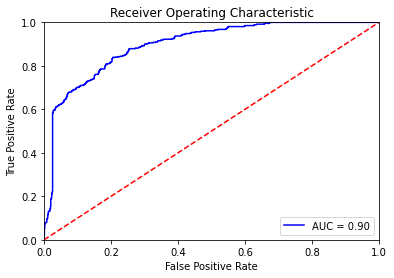

In [66]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Reducing Features using PCA

In [67]:
from sklearn.decomposition import PCA
# raw data
X = data.drop('y', axis=1).values
y = data['y'].values
# split, random_state is used for repeatable results, you should remove it if you are running your own code.
pca = PCA(n_components=0.9)
x_pca = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.30, random_state=42)
x_pca.shape

(7276, 24)

## Observation : To capture 90% variance we need only 24 Features out of 56

In [0]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.1],
                     'C': [1]},
                    {'kernel': ['linear'], 'C': [1]}]

## Training after appliying PCA

In [69]:
clf = GridSearchCV(SVC(probability=True), tuned_parameters, cv=5, scoring='precision')
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1], 'gamma': [0.1], 'kernel': ['rbf']},
                         {'C': [1], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='precision', verbose=0)

In [70]:
print('The best model is: ', clf.best_params_)
print('This model produces a mean cross-validated score (precision) of', clf.best_score_)

The best model is:  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
This model produces a mean cross-validated score (precision) of 0.7998269853214348


## Testing after appliying PCA

In [71]:
y_true, y_pred = y_test, clf.predict(X_test)
pre2 = precision_score(y_true, y_pred)
rec2 = recall_score(y_true, y_pred)
acc2 = accuracy_score(y_true, y_pred)
f1_2 = f1_score(y_true, y_pred)
print('precision on the evaluation set: ', pre2)
print('recall on the evaluation set: ', rec2)
print('accuracy on the evaluation set: ', acc2)

precision on the evaluation set:  0.8419889502762431
recall on the evaluation set:  0.703601108033241
accuracy on the evaluation set:  0.7874484654145671


### ----------------------------------------------------------------------------------------------------------------------------------------------------

## Comparing the results

In [72]:

table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score Without PCA': [acc1, pre1, rec1, f1_1],
    'Score With PCA': [acc2, pre2, rec2, f1_2]
    })
table

Metric  Score Without PCA  Score With PCA
0   Accuracy           0.799817        0.787448
1  Precision           0.848060        0.841989
2     Recall           0.726685        0.703601
3   F1 Score           0.782695        0.766600

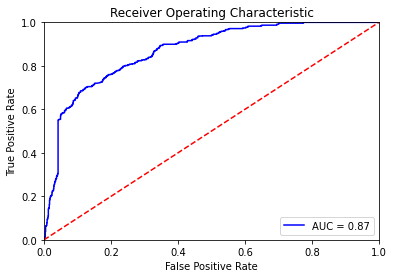

In [73]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Observation : We can get the almost same accuracy using just 24 Features obtained by using PCA instead of using all the 56 Features